In [1]:
import os
from crnn import CRNN
import torch
import torchvision
import dataset
from torch.autograd import Variable
import utils
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nh = 100
alphabet = '0123456789'
nclass = len(alphabet) + 1
nc = 1
mynet = CRNN(32, nc, nclass, nh)

In [3]:
converter = utils.strLabelConverter(alphabet)

In [4]:
mynet.load_state_dict(torch.load('./crnn_model.pth'))
mynet = mynet.cuda()

In [5]:
def show_result(img_name):
    root = '/home/sherlock/Documents/express_recognition/data/train/telephone'
    img_path = os.path.join(root, img_name)
    transformer = dataset.resizeNormalize((256, 32))
    image = Image.open(img_path).convert('L')
    image = transformer(image).cuda()
    image = image.view(1, *image.size())
    image = Variable(image)
    
    mynet.eval()
    preds = mynet(image) # sequence_length x batch_size x n_classes
    _, preds = preds.max(2) # sequence_length x batch_size x 1
    preds = preds.view(-1) # sequence_length x 1
    preds_size = torch.IntTensor([preds.size(0)])
    raw_pred = converter.decode(preds.data, preds_size, raw=True)
    sim_pred = converter.decode(preds.data, preds_size, raw=False)
    pic = Image.open(img_path)
    plt.imshow(pic)
    plt.show()
    print('{} => {}'.format(raw_pred, sim_pred))

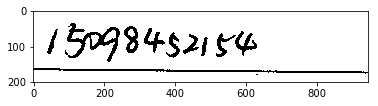

1550009988888-------------------------------------------442221544 => 1509842154


In [6]:
show_result('1_140_1_1.png')

In [192]:
root = '/home/sherlock/Documents/express_recognition/data/validation/telephone'
img_path = os.path.join(root, '17_210_1_1.png')
transformer = dataset.resizeNormalize((128, 32))
image = Image.open(img_path).convert('L')
image = transformer(image).cuda()
image = image.view(1, *image.size())
image = Variable(image)

mynet.eval()
preds = mynet(image) # preds sequence_length x batch_size x n_classes

In [193]:
preds = preds.squeeze(1)

In [194]:
import torch.nn.functional as F

In [195]:
preds = F.softmax(preds)

In [196]:
prob, label = torch.max(preds, 1)

In [197]:
tele = ''
for i in range(label.size(0)):
    if prob[i].cpu().data[0] > 0.9:
        if label[i].cpu().data[0] == 0:
            tele += '-'
        else:
            tele += str(label[i].cpu().data[0]-1)

In [198]:
tele

'1155111071445555-55577777------'

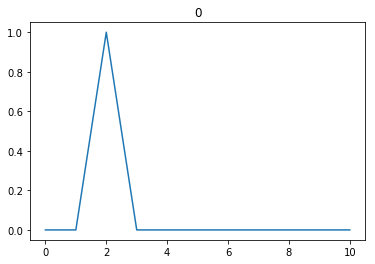

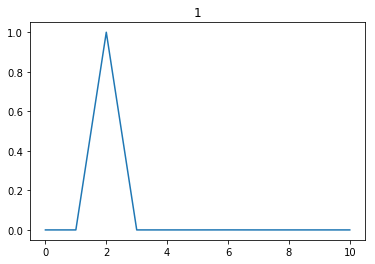

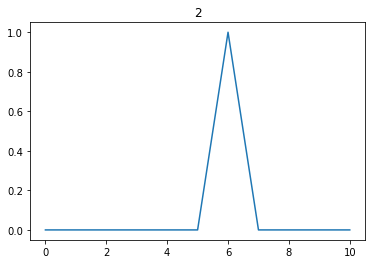

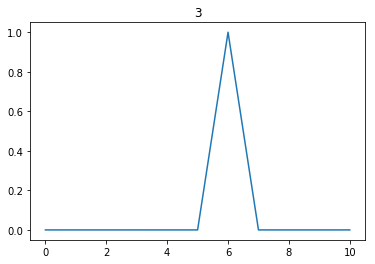

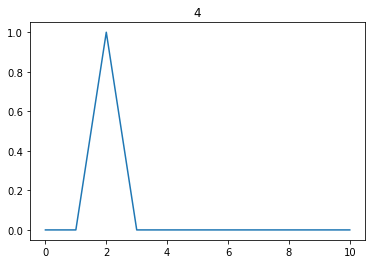

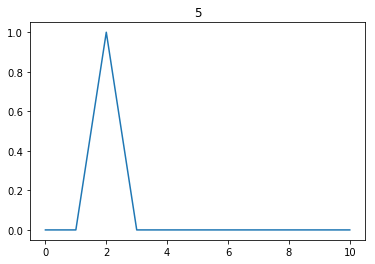

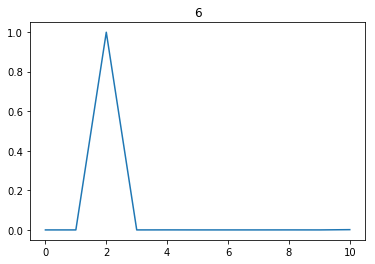

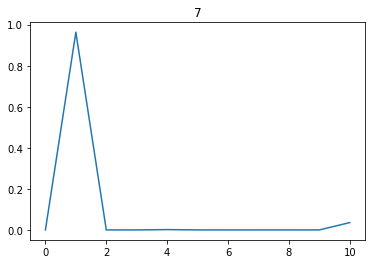

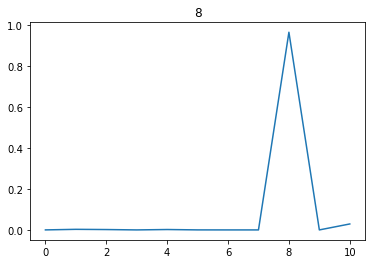

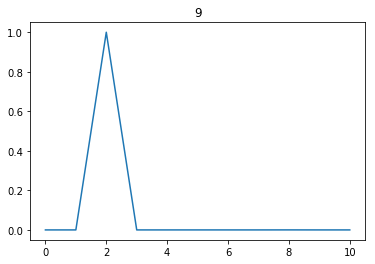

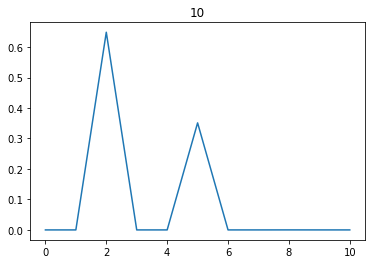

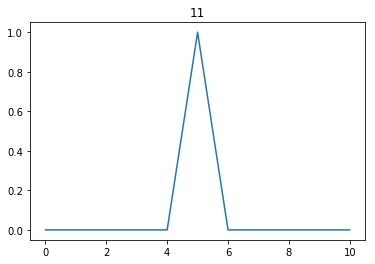

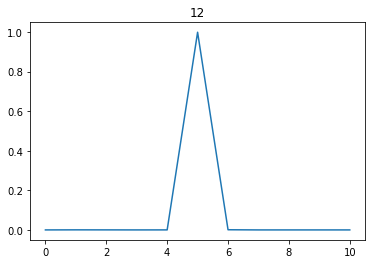

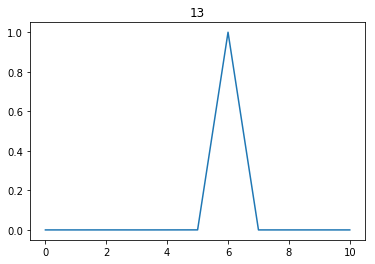

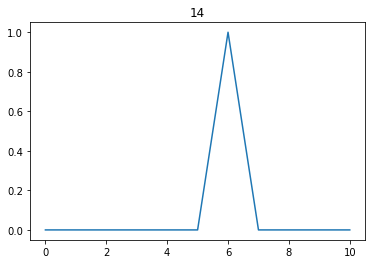

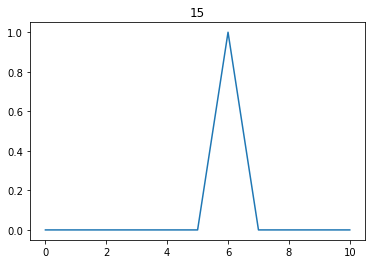

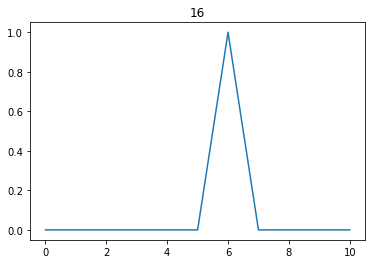

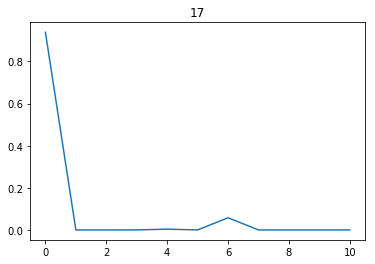

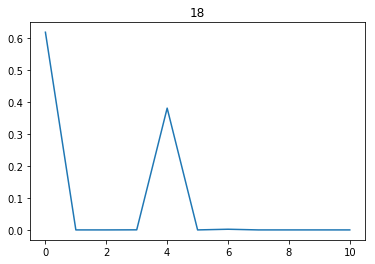

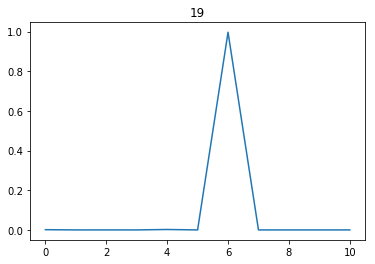

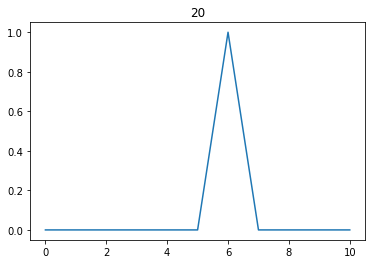

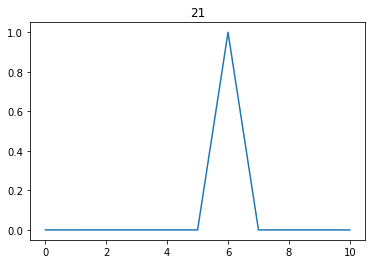

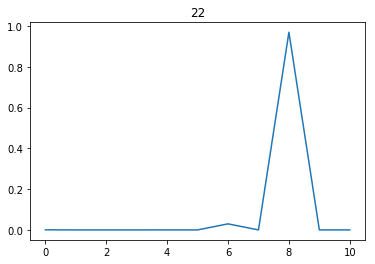

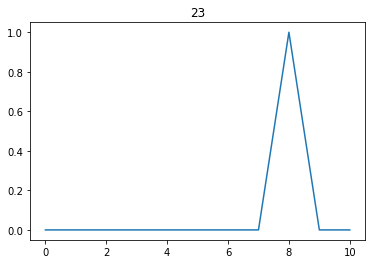

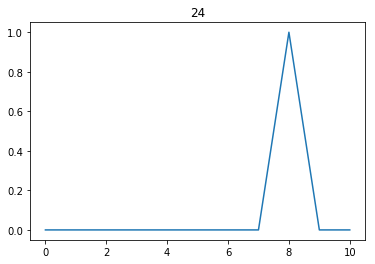

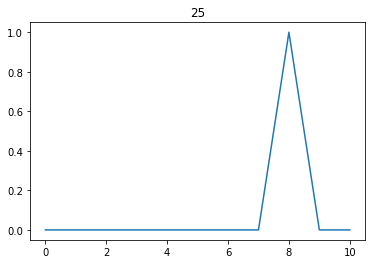

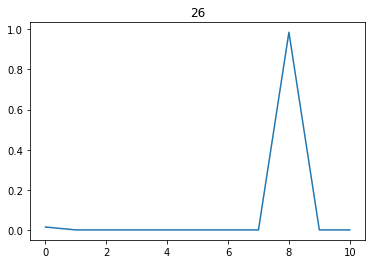

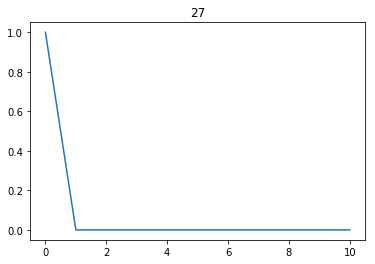

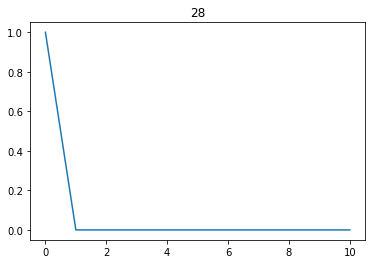

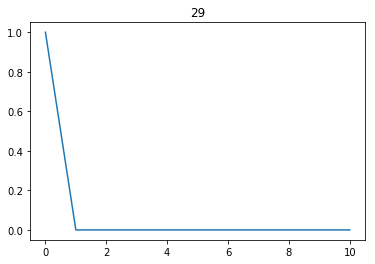

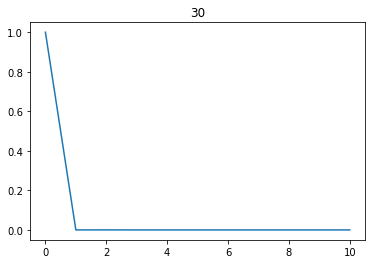

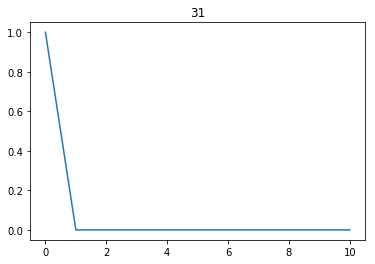

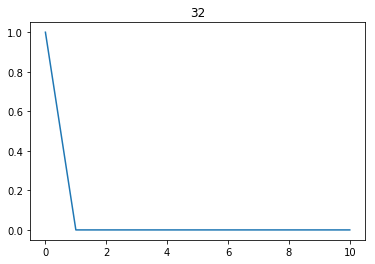

In [199]:
for i in range(preds.size(0)):
    label = preds.cpu().data[i, :]
    label = label.numpy()
    plt.plot(label)
    plt.title('{}'.format(i))
    plt.show()

In [ ]:
all_file_name = os.listdir('/home/sherlock/Documents/express_recognition/data/validation/telephone/')

for img in all_file_name:
    show_result(img)
    print()